# Bank Regulator Text Analsyis

In [1]:
#Importing Various needed modules
import glob, nltk
from nltk.tokenize import word_tokenize, sent_tokenize
import re
import os
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
import string
import gensim
from gensim import corpora, models, similarities
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd
import pprint
import csv
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
# Loading all txt files into one corpus
#corpus = PlaintextCorpusReader("../Data", ".txt",encoding='utf-8') #All text files 
corpus = PlaintextCorpusReader("../Data", ".*intro.txt",encoding='utf-8') #All yearly reportintro text files
#corpus = PlaintextCorpusReader("../Data", "2004.*txt",encoding='utf-8') #All 2004 text files
#corpus = PlaintextCorpusReader("../Data", ".*y.*txt",encoding='utf-8') #All yearly report text files
corpus = PlaintextCorpusReader("../Data/Clean", ".*y.*txt",encoding='utf-8') #All yearly report text files

all_text=corpus.raw()

In [3]:
files=corpus.fileids()
for file in files:
    raw = corpus.raw(file)
    print(file,"--",len(nltk.word_tokenize(raw)))

39
2003y (1).txt -- 24686
2003y (2).txt -- 17683
2003y (3).txt -- 7163
2003y (4).txt -- 11462
2003y (5).txt -- 8606
2004y (1).txt -- 7511
2004y (2).txt -- 5935
2004y (3).txt -- 31886
2005y (1).txt -- 14747
2005y (2).txt -- 5920
2005y (3).txt -- 10325
2005y (4).txt -- 10223
2006y (1).txt -- 9918
2006y (2).txt -- 13399
2006y (3).txt -- 7042
2006y (4).txt -- 14419
2007y (1).txt -- 19771
2007y (2).txt -- 10801
2007y (3).txt -- 14158
2007y (4).txt -- 6227
2008y (1).txt -- 13949
2008y (2).txt -- 22940
2008y (3).txt -- 9442
2008y (4).txt -- 18898
2009y (1).txt -- 20424
2009y (2).txt -- 9416
2009y (3).txt -- 15095
2009y (4).txt -- 11905
2010y (1).txt -- 15546
2010y (2).txt -- 1362
2010y (3).txt -- 45614
2013y (1).txt -- 8527
2013y (2).txt -- 16924
2014y (1).txt -- 19647
2014y (2).txt -- 15264
2015y (1).txt -- 25290
2015y (2).txt -- 17088
2016y.txt -- 35128
2017y.txt -- 52624


In [9]:
# Removing punctation marks ('!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~') from raw text
all_text2 = raw.translate(str.maketrans("","", string.punctuation))
#Removing numbers, english letters and ־
clean = re.sub(r'\d+', '', all_text2)
clean = re.sub(r'[a-zA-Z]', '', clean)
clean = clean.translate(str.maketrans("","", "־"))
#Removing small (<2) words
clean2 = ' '.join([word for word in clean.split() if len(word) >2])

In [11]:
# Tokenizing full string into a list of words
words = nltk.word_tokenize(clean2)

In [12]:
sentences = nltk.sent_tokenize(all_text)

In [13]:
# num of words in each intro to yearly report, raw and after taking out punctuation.
with open("output.csv", "w", newline="") as csvfile:
    fieldnames = ["Year", "Length"]
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for file in files:
        raw = corpus.raw(file)
        all_text2 = raw.translate(str.maketrans("","", string.punctuation))
        clean = re.sub(r'\d+', '', all_text2)
        clean = re.sub(r'[a-zA-Z]', '', clean)
        clean = clean.translate(str.maketrans("","", "־"))
        clean2 = ' '.join([word for word in clean.split() if len(word) >2])
        words = nltk.word_tokenize(clean2)
        #print(file,"--",len(nltk.word_tokenize(raw)))
        writer.writerow({"Year": file.split("y")[0], "Length": len(words)})
df = pd.read_csv('output.csv')

In [14]:
df.set_index("Year",drop=True,inplace=True)

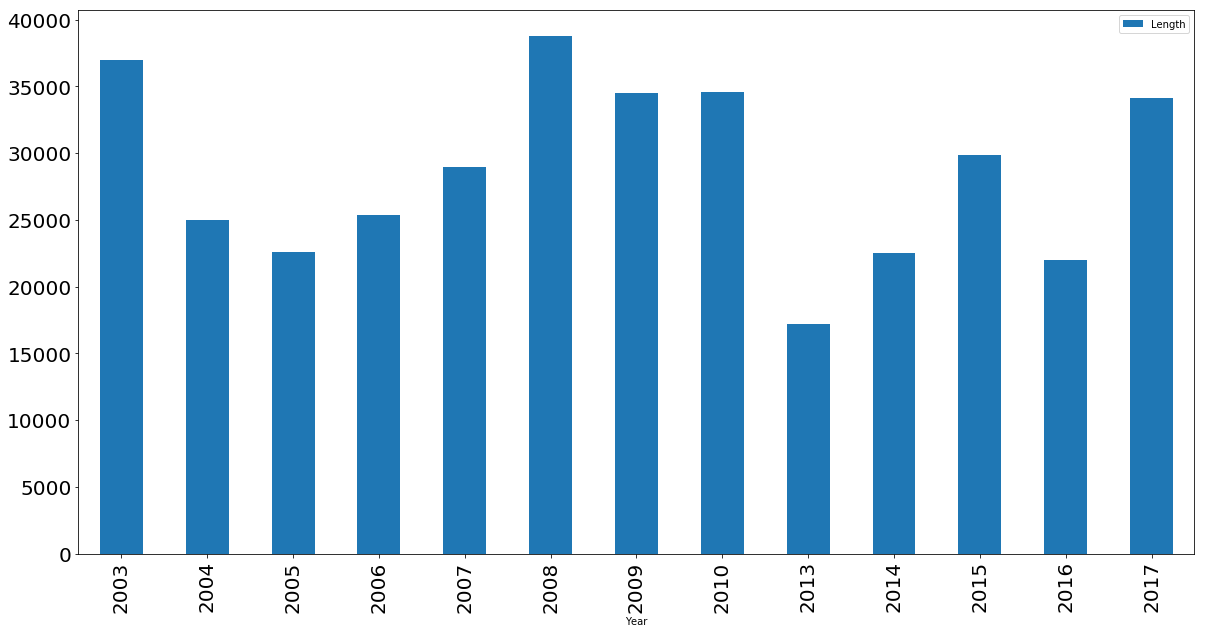

In [34]:
ax = df.groupby('Year').sum().plot(kind='bar', figsize=(20,10), fontsize=20)

In [ ]:
# num of occurances of keywords in each intro to yearly report
keywords = "תחרות	סיכונ	יציב	לקוח	צרכנ	נהל	פקח	הונ	צמח	האט	שבר".split()
for file in files:
    for keyword in keywords:
        raw = corpus.raw(file)
        all_text2= raw.translate(str.maketrans("","", string.punctuation))
        all_text3= all_text2.translate(str.maketrans("ךםןףץ","כמנפצ"))
        clean = ' '.join([word for word in all_text3.split() if len(word) >2])
        words = nltk.word_tokenize(clean)
        t = [word for word in words if keyword in word]
        print(file,"-",keyword,"-has-",len(t),"-apperances")

In [16]:
# num of occurances of most common words in each intro to yearly report
for file in files:
    raw = corpus.raw(file)
    all_text2= raw.translate(str.maketrans("","", string.punctuation))
    all_text3= all_text2.translate(str.maketrans("ךםןףץ","כמנפצ"))
    clean = ' '.join([word for word in all_text3.split() if len(word) >2])
    words = nltk.word_tokenize(clean)
    print("\n", Counter(words).most_common(10))


 [('2003', 235), ('2002', 151), ('הבנקימ', 148), ('האשראי', 95), ('בשנת', 95), ('הבנקאות', 89), ('מיליארד', 79), ('לוח', 79), ('השנה', 72), ('הרווח', 72)]

 [('2003', 184), ('האשראי', 169), ('2002', 111), ('ההונ', 95), ('בשנת', 73), ('הקבוצות', 69), ('במגזר', 62), ('לוח', 61), ('הבנקימ', 57), ('הבנקאיות', 56)]

 [('הבנקימ', 99), ('הפיקוח', 53), ('2003', 36), ('הבנקאות', 32), ('מידע', 28), ('המידע', 25), ('היחידה', 25), ('בנק', 24), ('ניהול', 23), ('בתחומ', 23)]

 [('האשראי', 120), ('הבנקימ', 106), ('2003', 98), ('בשנת', 73), ('הבנקאות', 66), ('ההונ', 52), ('הקבוצות', 50), ('הבנקאיות', 48), ('מערכת', 45), ('יחס', 43)]

 [('2003', 56), ('מספר', 55), ('הבנקימ', 52), ('בישראל', 51), ('בנק', 51), ('הבנקאות', 47), ('מערכת', 40), ('האשראי', 37), ('לוח', 32), ('אשראי', 29)]

 [('���', 99), ('����', 67), ('בנק', 59), ('2004', 57), ('הבנקאות', 49), ('מספר', 43), ('הבנקימ', 42), ('מערכת', 37), ('�����', 35), ('בישראל', 30)]

 [('הבנקימ', 74), ('2004', 53), ('הפיקוח', 34), ('בנק', 29), ('היחידה',

 If object is string - length is number of letters.
 If object is list - length is number of elements in list -
 so if object words - it's number of words.
 
 for i in all_text2, clean, words, sentences:
 print(type(i))
 print(len(i))

In [ ]:
print("hello!")

In [ ]:
#bigrams with CountVectorizer
count_vec = CountVectorizer(analyzer='word', 
                            ngram_range=(2, 2), max_df=1.0, min_df=1, max_features=None)
for file in files:
    raw = corpus.raw(file)
    all_text2= raw.translate(str.maketrans("","", string.punctuation))
    all_text3= all_text2.translate(str.maketrans("ךםןףץ","כמנפצ"))
    clean = ' '.join([word for word in all_text3.split() if len(word) >2])
    count_train = count_vec.fit([clean])
    bag_of_words = count_vec.transform([clean])
    type(count_train)
    #print("Vocabulary size: {}".format(len(count_train.vocabulary_)))
    #print("\nTop 5 features:\n{}".format(count_vec.get_feature_names()[:5]))
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in count_vec.vocabulary_.items()]
    bigram_freq = (sorted(words_freq, key = lambda x: x[1], reverse=True))
    print(bigram_freq[:10],"\n")

# sentiment analysis


In [ ]:
#first build 2 lists of pos and neg
positive_vocab = ["מצוין", "אדיר"]
negative_vocab = ["גרוע"]
neutral_vocab = ["בסדר"]

In [ ]:
def word_feats(words):
    return dict([(word, True) for word in words])
 
positive_features = [(word_feats(pos), 'pos') for pos in positive_vocab]
negative_features = [(word_feats(neg), 'neg') for neg in negative_vocab]
neutral_features = [(word_feats(neu), 'neu') for neu in neutral_vocab]

In [ ]:
positive_features

In [ ]:
positive_vocab = [ 'awesome', 'outstanding', 'fantastic', 'terrific', 'good', 'nice', 'great', ':)' ]
negative_vocab = [ 'bad', 'terrible','useless', 'hate', ':(' ]
neutral_vocab = [ 'movie','the','sound','was','is','actors','did','know','words','not' ]
def word_feats(words):
    return dict([(word, True) for word in words])
 
positive_features = [(word_feats(pos), 'pos') for pos in positive_vocab]
negative_features = [(word_feats(neg), 'neg') for neg in negative_vocab]
neutral_features = [(word_feats(neu), 'neu') for neu in neutral_vocab]
neutral_features

In [ ]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import names
 
def word_feats(words):
    return dict([(word, True) for word in words])
 
positive_vocab = [ 'awesome', 'outstanding', 'fantastic', 'terrific', 'good', 'nice', 'great', ':)' ]
negative_vocab = [ 'bad', 'terrible','useless', 'hate', ':(' ]
neutral_vocab = [ 'movie','the','sound','was','is','actors','did','know','words','not','it' ]
 
positive_features = [(word_feats(pos), 'pos') for pos in positive_vocab]
negative_features = [(word_feats(neg), 'neg') for neg in negative_vocab]
neutral_features = [(word_feats(neu), 'neu') for neu in neutral_vocab]
 
train_set = negative_features + positive_features + neutral_features
 
classifier = NaiveBayesClassifier.train(train_set) 
 
# Predict
neg = 0
pos = 0
sentence = "Awesome film, I liked it"
sentence = sentence.lower()
words = sentence.split(' ')
for word in words:
    classResult = classifier.classify( word_feats(word))
    if classResult == 'neg':
        neg = neg + 1
    if classResult == 'pos':
        pos = pos + 1
 
print('Positive: ' + str(float(pos)/len(words)))
print('Negative: ' + str(float(neg)/len(words)))

In [ ]:
from gensim.corpora import WikiCorpus

language_code = "he"
inp = language_code+"wiki-latest-pages-articles.xml.bz2"
outp = "wiki.{}.text".format(language_code)
i = 0

print("Starting to create wiki corpus")
output = open(outp, 'w')
space = " "
wiki = WikiCorpus(inp, lemmatize=False, dictionary={})
for text in wiki.get_texts():
  article = space.join([t.decode("utf-8") for t in text])

  output.write(article + "\n")
  i = i + 1
  if (i % 1000 == 0):
    print("Saved " + str(i) + " articles")

output.close()
print("Finished - Saved " + str(i) + " articles")